# Machine learning snippets - with demo data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from blob_demo import blob_demo
from ML_snippets import *

## A demo data set

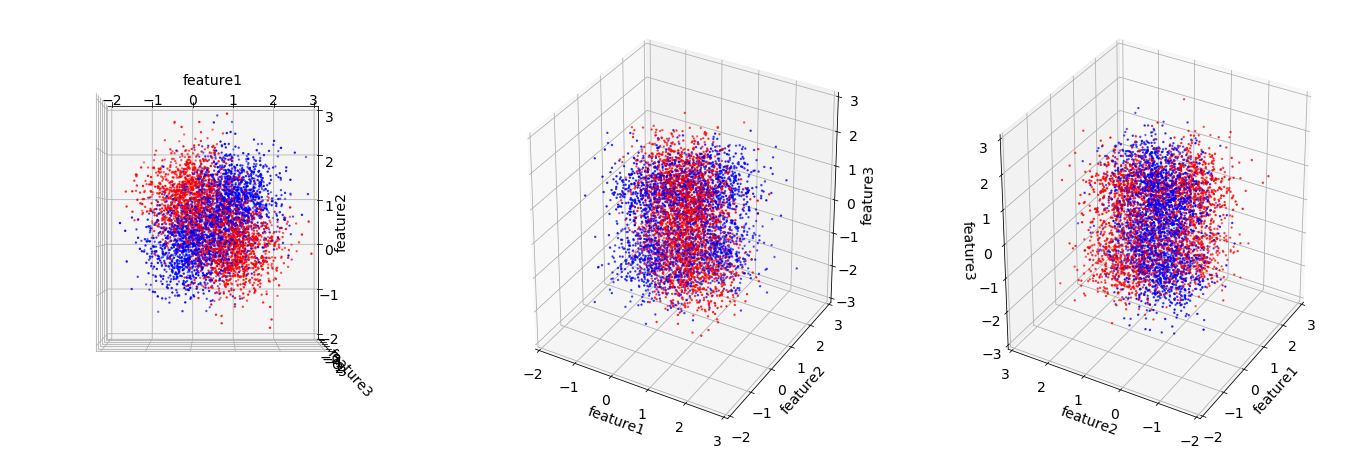

In [2]:
X, y = blob_demo()

## A straightforward random forest classifier

In [3]:
# Split into training and testing data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

# Build the classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs = -1, n_estimators = 100)
clf = clf.fit(Xtrain, ytrain)

## Feature importances

          importance
feature             
feature1    0.380352
feature2    0.377076
feature3    0.242572


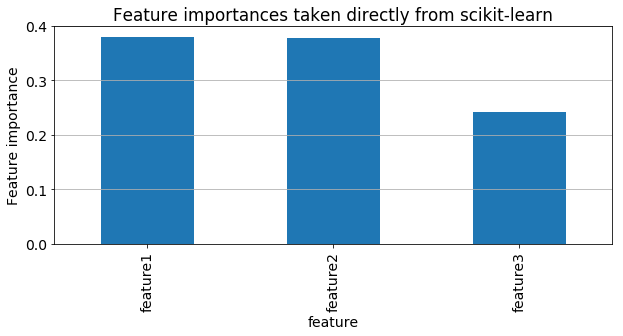

In [4]:
# This is a fairly standard way to pull feature importances from sklearn
importances = pd.DataFrame(X.columns, columns=['feature'])
importances['importance'] = clf.feature_importances_
importances = importances.set_index('feature').sort_values(
    'importance', ascending=False
)

# Show the importances numerically
print(importances)

# Show the importances graphically
plt.rcParams['figure.figsize'] = 10,4
plt.rcParams['font.size'] = 14
importances.plot(kind = 'bar', legend = False) 
plt.grid(axis = 'y')
plt.ylabel('Feature importance')
plt.title('Feature importances taken directly from scikit-learn')
plt.show()

          importance
feature             
feature2    0.286586
feature1    0.284136
feature3   -0.010896


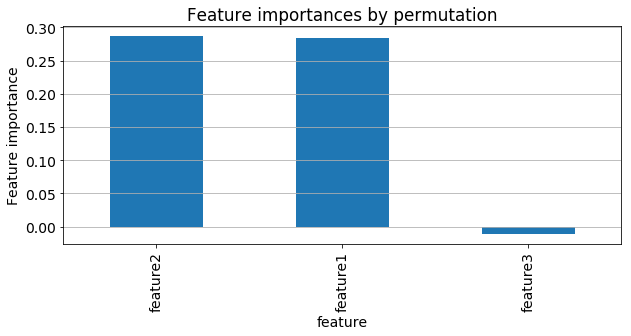

In [5]:
# Calculate feature importances by permutation
importances = pd.DataFrame(X.columns, columns=['feature'])
importances['importance'] = permutation_importances(clf, Xtest, ytest)
importances = importances.set_index('feature').sort_values(
    'importance', ascending=False
)

# Show the importances numerically
print(importances)

# Show the importances graphically
plt.rcParams['figure.figsize'] = 10,4
plt.rcParams['font.size'] = 14
importances.plot(kind = 'bar', legend = False) 
plt.grid(axis = 'y')
plt.ylabel('Feature importance')
plt.title('Feature importances by permutation')
plt.show()

## Evaluation of a classifier

### ROC curve and AUC

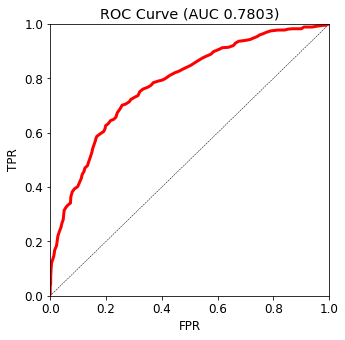

In [6]:
plt.rcParams['figure.figsize'] = 5,5
plt.rcParams['font.size'] = 12
plot_roc(clf, Xtest, ytest)

### Precision and recall

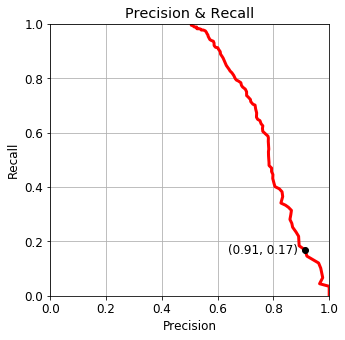

In [7]:
plot_prc(clf, Xtest, ytest, precision = .9)

### Cumulative gain

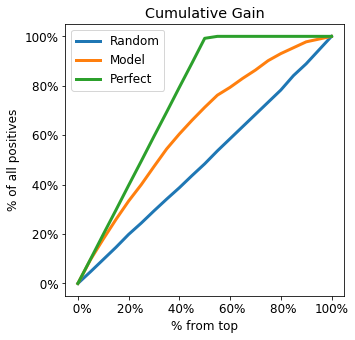

In [8]:
plot_gain(clf, Xtest, ytest)

### Kolmogorov-Smirnov chart and statistic

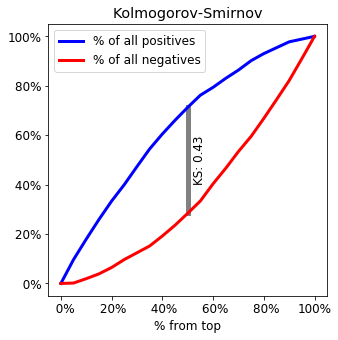

In [9]:
KS = plot_ks(clf, Xtest, ytest)

### Lift (at quantile)

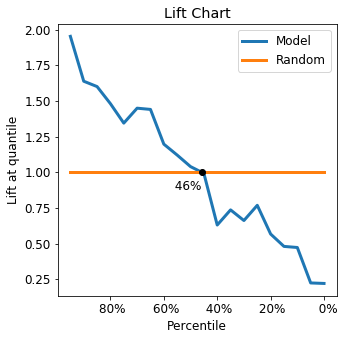

In [10]:
plot_lift(clf, Xtest, ytest)

### Cumulative lift

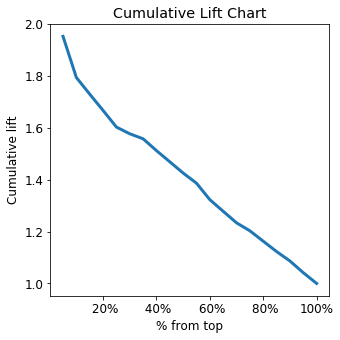

In [11]:
spf = plot_cumlift(clf, Xtest, ytest)

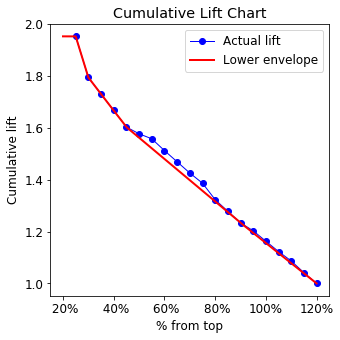

In [12]:
spf = plot_cumlift(clf, Xtest, ytest, show_spf = True)

## Visualizing classifier output on an individual level

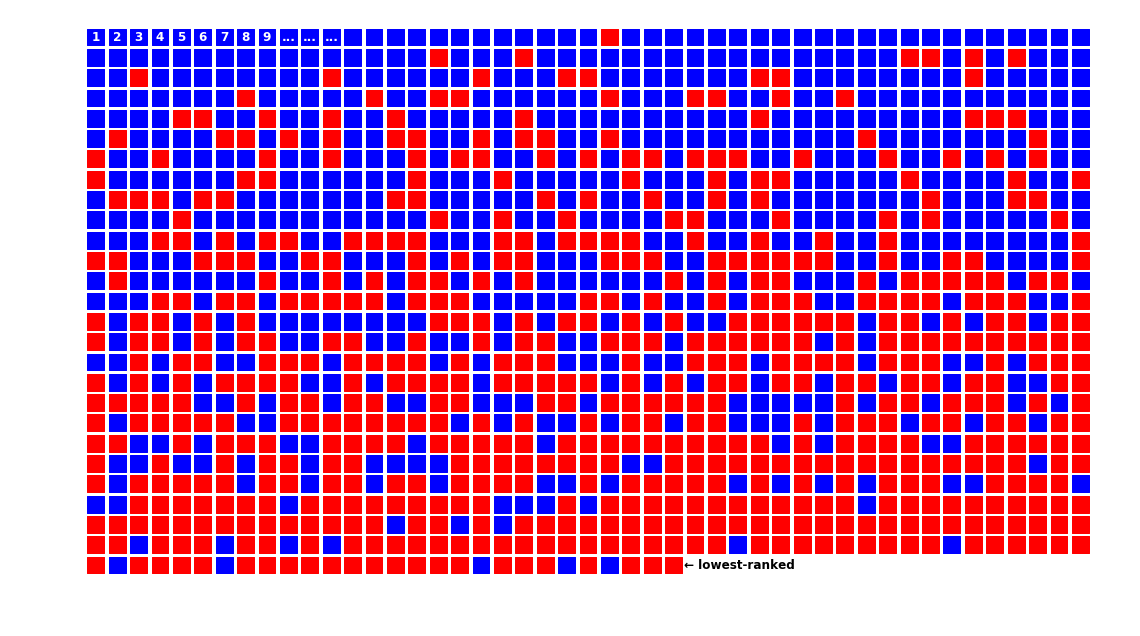

In [13]:
indiv_plot(clf, Xtest, ytest, 16, 9)    

## Two-AUC significance test

Random forest vs. linear SVM
Diff. in AUCs = 0.24353046595
      P-value = 0.0


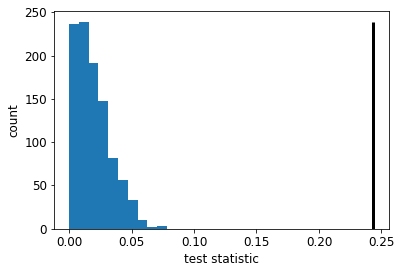

Random forest vs. quadratic SVM
Diff. in AUCs = 0.0289759344598
      P-value = 0.204


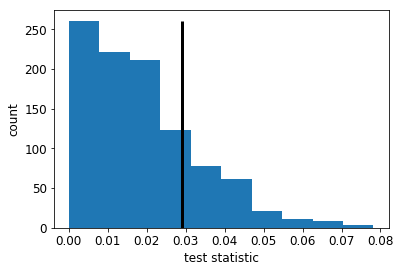

Random forest vs. RBF SVM
Diff. in AUCs = 0.0335739887353
      P-value = 0.137


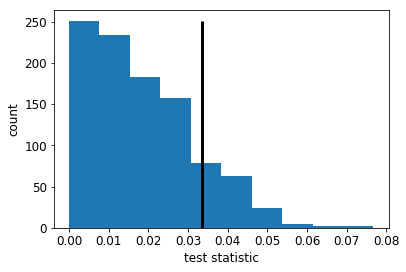

Quadratic SVM vs. RBF SVM
Diff. in AUCs = 0.0625499231951
      P-value = 0.005


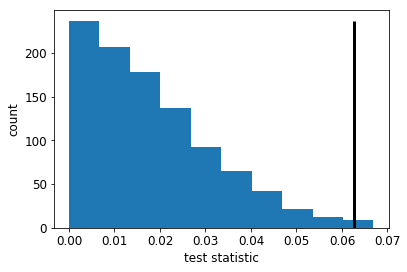

In [14]:
# Build some SVM to compare with the random forest
from sklearn.svm import SVC
clf2 = SVC(probability = True, kernel='linear').fit(Xtrain, ytrain)
clf3 = SVC(probability = True, kernel='poly', degree=2).fit(Xtrain, ytrain)
clf4 = SVC(probability = True).fit(Xtrain, ytrain)

plt.rcParams['figure.figsize'] = 6, 4

print('Random forest vs. linear SVM')
TestAUCs(clf, clf2, Xtest.values, ytest.values)

print('Random forest vs. quadratic SVM')
TestAUCs(clf, clf3, Xtest.values, ytest.values)

print('Random forest vs. RBF SVM')
TestAUCs(clf, clf4, Xtest.values, ytest.values)

print('Quadratic SVM vs. RBF SVM')
TestAUCs(clf3, clf4, Xtest.values, ytest.values)

## Properly-labeled confusion matrix

In [15]:
cm_labeled(clf, Xtest, ytest, threshold = 0.8)

,Predicted positive,Predicted negative
Actually positive,230,400
Actually negative,46,574
